<a href="https://colab.research.google.com/github/mo-nathan/mo-ml/blob/main/first_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
from fastai.vision.all import *
MO_URL = "https://images.mushroomobserver.org/first_pass.tgz"
path = untar_data(MO_URL)
fnames = get_image_files(path)

def label_func(x):
    return x.parent.name

dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

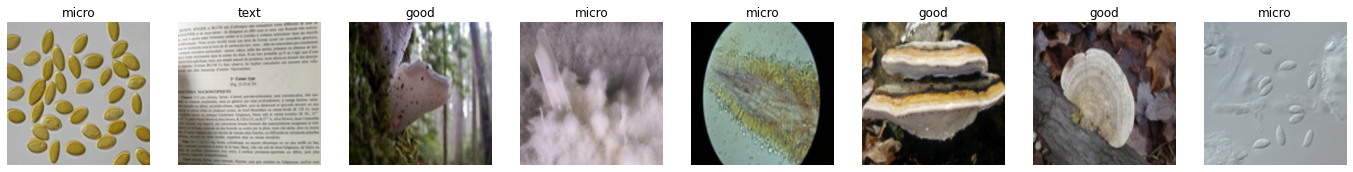

In [2]:
dls.valid.show_batch(max_n=8, nrows=1)

In [3]:
dls.vocab

['good', 'illustration', 'micro', 'text']

In [3]:
learn.fine_tune(10)

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('good', 'illustration', 1), ('text', 'micro', 1)]

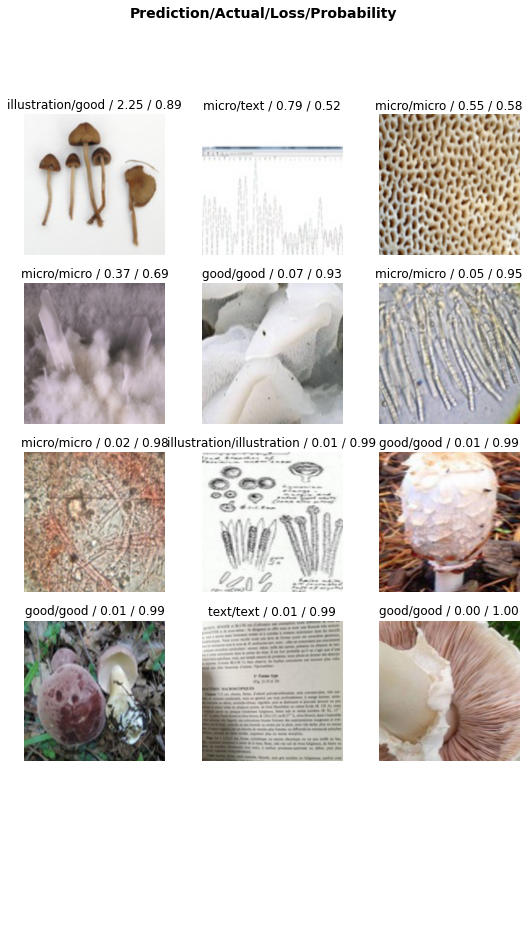

In [6]:
interp.plot_top_losses(12, nrows=4)

In [7]:
learn.save("first-pass-model")

Path('/root/.fastai/data/first_pass/models/first-pass-model.pth')

In [8]:
from google.colab import drive
drive.mount('/content/drive')
!cp /root/.fastai/data/first_pass/models/first-pass-model.pth /content/drive/MyDrive

Mounted at /content/drive


In [9]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
for idx in cleaner.delete(): print(f"https://mushroomobserver.org/image/show_image/{str(cleaner.fns[idx]).split('/')[-1].split('.')[0]}")

https://mushroomobserver.org/image/show_image/12841
https://mushroomobserver.org/image/show_image/130022
